In [8]:
import re
import csv
import os

# 定义日志文件路径
log_file_path = 'output.log'  # 请根据实际情况修改

# 初始化变量
experiment_name = ""
eval_data = []

# 正则表达式模式
experiment_pattern = r'^Starting Experiment:\s*(.+)$'
eval_pattern = r'^>Eval:\s*Iter=(\d+)\s*\(([\d.]+)\s*epochs\)\s*val_loss=([\d.]+)\s*val_pp=([\d.]+)\s*val_acc=([\d.]+)'

# 读取日志文件
with open(log_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        
        # 提取实验名称
        if not experiment_name:
            match_exp = re.match(experiment_pattern, line)
            if match_exp:
                experiment_name = match_exp.group(1)
                continue
        
        # 提取评估数据
        match_eval = re.match(eval_pattern, line)
        if match_eval:
            iter_num = match_eval.group(1)
            epoch = match_eval.group(2)
            val_loss = match_eval.group(3)
            val_pp = match_eval.group(4)
            val_acc = match_eval.group(5)
            
            eval_data.append({
                'Iter': iter_num,
                'Epoch': epoch,
                'val_loss': val_loss,
                'val_pp': val_pp,
                'val_acc': val_acc
            })

# 检查是否提取到实验名称和评估数据
if not experiment_name:
    print("未能在日志文件中找到实验名称。")
    exit(1)

if not eval_data:
    print("未能在日志文件中找到评估数据。")
    exit(1)

# 生成安全的文件名
# 替换可能导致文件名问题的字符，例如冒号、斜杠等
safe_experiment_name = re.sub(r'[\\/:"*?<>|]+', '_', experiment_name)

# 定义输出的 CSV 文件路径
csv_file_name = f"{safe_experiment_name}_test.csv"
csv_file_path = os.path.join('.', csv_file_name)  # 当前目录，可根据需要修改

# 写入 CSV 文件
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    # 创建 CSV 写入器
    writer = csv.DictWriter(csvfile, fieldnames=['Iter', 'Epoch', 'val_loss', 'val_pp', 'val_acc'])
    
    # 写入实验名称作为标题（在第一行）
    # csvfile.write(f"Experiment: {experiment_name}\n")
    
    # 写入表头
    writer.writeheader()
    
    # 写入评估数据
    for data in eval_data:
        writer.writerow(data)

print(f"CSV 文件已成功生成：{csv_file_path}")

CSV 文件已成功生成：./slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup300_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv


原始数据预览:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.392  0.014713
1   200  0.004     5.858    349.917  0.182350
2   400  0.007     5.002    148.703  0.237667
3   600  0.011     4.520     91.820  0.294030
4   800  0.014     4.347     77.268  0.309012
找到 65 条 Iter 在 2000 和 14800 之间的数据。


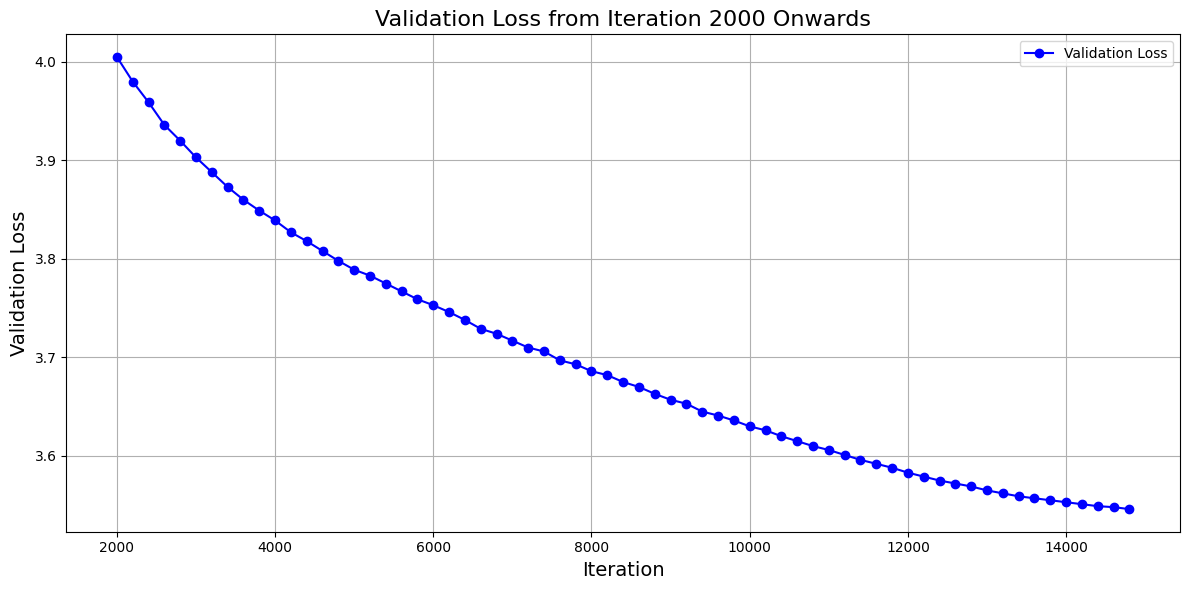

In [9]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
csv_file = csv_file_path  # 请替换为你的文件路径
df = pd.read_csv(csv_file)

# 显示前几行数据
print("原始数据预览:")
print(df.head())

# 数据预处理
df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
df = df.dropna(subset=['Iter', 'val_loss'])

# 过滤数据
start_iter = 2000
end_iter = 14800   # 结束迭代步数

df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]


# 检查过滤后的数据是否为空
if df_filtered.empty:
    print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
else:
    print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")


    # 绘图
    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', color='b', label='Validation Loss')
    
    plt.xlabel('Iteration', fontsize=14)
    plt.ylabel('Validation Loss', fontsize=14)
    plt.title(f'Validation Loss from Iteration {start_iter} Onwards', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
